In [1]:
import numpy as np
import matplotlib.pyplot as plt

a) $Simulación:$ 
1. Utilizando random.uniform (numpy), generar un dataset de 500 pares de muestras (X,Y ) de la siguiente forma:   X ∼ U(−1,1), Y|X = x ∼ N(r(x),σ2) con σ2 = 0.04 y r(x) = x1{x > 0} (función conocida como ReLU).

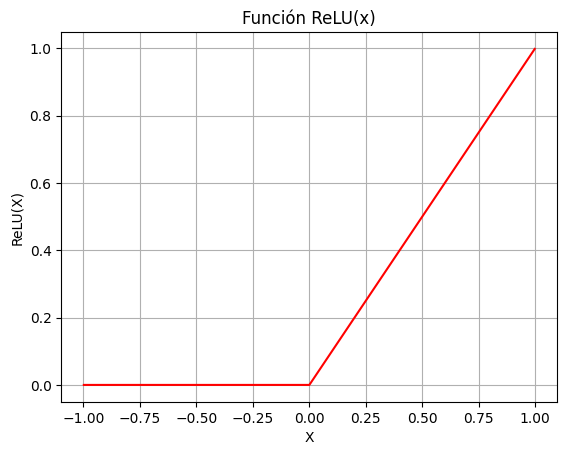

In [2]:
#Simulo X
n=500
X=np.random.uniform(-1,1,500)
#print(X)
def r(x):
    return np.where(x>0,x,0) #Acá la función where actúa como una indicadora.
    #Recibe una condición(x>0), que valor debe retornar en caso de que se cumpla (x), y qué en caso de que no (0).

#plt.plot(X,r(X), label="r(x)")
#Sale cualquier cosa así porque los puntos están en orden aleatorio, para que quede bien hay que usar np.sort

plt.plot(np.sort(X),r(np.sort(X)),color="red")
plt.xlabel("X")
plt.ylabel("ReLU(X)") 
plt.grid(True)
plt.title("Función ReLU(x)")
plt.show()

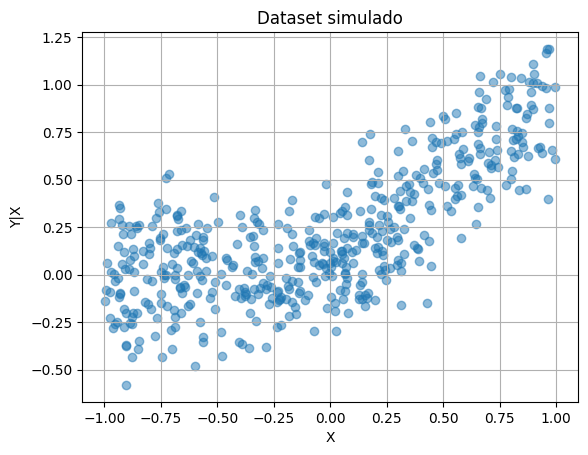

In [3]:
#Simulo Y dado X
sigma=0.2
Y_x=np.random.normal(r(X),sigma,n)
plt.scatter(X,Y_x,alpha=0.5, label="Dataset de 500 muestras")#El alpha hace que los puntos superpuestos no sean opacos
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y|X")  
plt.title("Dataset simulado")
plt.show()

b) $Análisis$ $Teórico:$
1. Calcular analíticamente E[X], E[Y], var(X), var(Y) y E[XY].

Como $X$ se trata de una distribución uniforme $U(-1;1)$ sabemos que su esperanza se puede calcular como:
 
$\mathbb{E}[X]=\frac{1+(-1)}{2}=0$

Luego, para el caso de $\mathbb{E}[Y]$, es necesario aplicar la ley de la esperanza total

$\mathbb{E}[Y]={E}[{E[Y|X=x]}]$

La distribución de Y|X=x la recibimos como dato del problema original, por lo que:

$\mathbb{E}[Y]={E}[{E[Y|X=x]}]={r(x)}$

Para el caso de la esperanza conjunta, simplemente se condiciona respecto de X, y esta resulta constante, por lo que se puede separar en un producto:

$\mathbb{E}[XY]={E}[{E[XY|X=x]}]={E}[X{E[Y|X=x]}]={E}[X{r(x)}]=\int_{-1}^{1} \frac{1}{2}{x}{r(x)}\,dx=\frac{1}{6}$

Para la $\mathbb{Var(X)}$,calculamos la varianza de una uniforme:

$\mathbb{Var(X)}=\frac{(-1-1)^2}{12}=\frac{1}{3}$

Finalmente, para la $\mathbb{Var(Y)}$ se debe utilizar la ley de la varianza total:

$\mathbb{Var(Y)}={E}[{Var(Y|X=x)}]+{Var({E}[Y|X=x])}$

En este caso, $\mathbb{E}[{Var(Y|X=x)}]=0,04$ ya que se toma el resultado del  parámetro de la distribución normal, y para la $\mathbb{Var({E}[Y|X=x])}$ se sabe que $\mathbb{E}[Y|X=x]={r(x)}$ por lo que se tienen los datos suficientes para calcular la varianza por definición:

$\mathbb{Var({r(x)})}={E}[{r(x)^2}]-{E}[{r(x)}]^2$

Resolvemos:

$\mathbb{E}[{r(x)}]=\int_0^1 {r(x)} \frac{1}{2}\,dx=\frac{1}{4}$

$\mathbb{E}[{r(x)^2}]=\int_0^1 {r(x)^2} \frac{1}{2}\,dx=\frac{1}{6}$

$\therefore \mathbb{Var(Y)}={E}[{Var(Y|X=x)}]+{Var({E}[Y|X=x])}=\frac{1}{25}+\frac{5}{48}=\frac{173}{1200}\approx 0,14$

2. El regresor óptimo es $\mathbb{E}[Y|X=x]={r(x)}$ y el error bayesiano es la $\mathbb{E}[{Var(Y|X=x)}]=\sigma^2=0,04$

3. El mejor predictor sin observar X resulta $\mathbb{E}[Y]={E}[{E[Y|X=x]}]={r(x)}$. El error que cometería este es la $\mathbb{Var(Y)}\approx 0,14$. Este resultado tiene sentido, ya que no existe error menor al bayesiano.

c) $Regresión$ $Lineal$

Al utilizar la regresión lineal, lo que se busca es limitar el problema del overfitting, proponiendo una solución de baja complejidad. Si la aplicación de esta solución se obtiene un bajo error empírico, se tienen ciertas garantías de que el algoritmo tendrá un buen desempeño.
En la práctica, la regresión lineal se encarga de hallar la recta de regresión en lugar de la esperanza condicional. Dicho regresor se calcula como:

$\hat{Y}=w^T⋅X+b$

En el caso de la regresión lineal, el entrenamiento entonces buscará calcular

$(w,b) \in \arg \min_{(w,b)} \sum_{i=1}^{n} \left( w^T X_i + b - Y_i \right)^2$

es decir, hallar $w$ y $b$ que minimecen dicho ECM. Vectorizando la ecuación se tiene que
\begin{equation}
(w,b) \in \arg \min_{w} ||X⋅w-y||^2
\end{equation}
con
\begin{equation}
X =
\begin{pmatrix}
1 & X_{1}^{T} \\
1 & X_{2}^{T} \\
\vdots & \vdots \\
1 & X_{n}^{T}
\end{pmatrix},
\quad
y =
\begin{pmatrix}
Y_{1} \\
Y_{2} \\
\vdots \\
Y_{n}
\end{pmatrix},
\quad
w =
\begin{pmatrix}
b \\
w
\end{pmatrix}
\end{equation}

A partir de estas matrices se despeja que la solución matricial óptima es:

\begin{equation}
w = \left( X^{T}X \right)^{-1} X^{T}y
\end{equation}

En el código, primero se define la clase del siguiente modo:

In [4]:
class RegLineal:
    def __init__(self):
      self.params = None  # Inicializo los parámetros de b y w  # Voy guardando en este arreglo la evolucion del valor que va tomando el parámetro w en funcion de las iteraciones
      

    #Etapa de entrenamiento
    def fit(self,X,y):
      # Primero que nada añado la columna de 1's para el parámetro b
      i=len(X)
      X_b = np.vstack((np.ones(i), X)).T #vstack() apila los vectores y .T transpone la matriz
          # Queda una cosa así [1  X1]
          #                    [...   ...]
          #                    [1  Xn]
      # Se procede al cálculo de los parámetros utilizando el resultado de la pseudoinversa
      self.params = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

    #Etapa de testeo
    def predict(self,X):
      # Repito el cálculo de X_b
      i=len(X)
      X_b = np.vstack((np.ones(i), X)).T
      # Me devuelve los valores de y estimados mediante las muestras de X
      return X_b @ self.params

    # Cómputo del error
    def err_predict(self,X,y):
      y_pred = self.predict(X)
      # Planteo el ECM, es decir la esperanza de la diferencia al cuadrado
      return np.mean((y - y_pred)**2)

In [5]:
# Una vez definida la clase junto con sus funciones, la inicializo
RegLineal = RegLineal()

# Entrenamiento
RegLineal.fit(X,Y_x)
error_entrenamiento = RegLineal.err_predict(X,Y_x)
print("Error de entrenamiento:", error_entrenamiento)
print("Los parámetros encontrados para b y w son",RegLineal.params)

Error de entrenamiento: 0.05687273772450879
Los parámetros encontrados para b y w son [0.23997208 0.45154589]


In [6]:
# Testeo
# Quiero ver que tan cerca o lejos se encuentra el valor predicho mediante regresion y mediante la condicional, para un valor determinado de irradiancia de 0.5
irr_p = 0.5
potpred=RegLineal.predict(np.array([irr_p]))


y_pred = RegLineal.predict(X)
print("El valor predicho de potencia, mediante la recta de regresión, para una irradiancia ", irr_p, "es", potpred)


El valor predicho de potencia, mediante la recta de regresión, para una irradiancia  0.5 es [0.46574502]


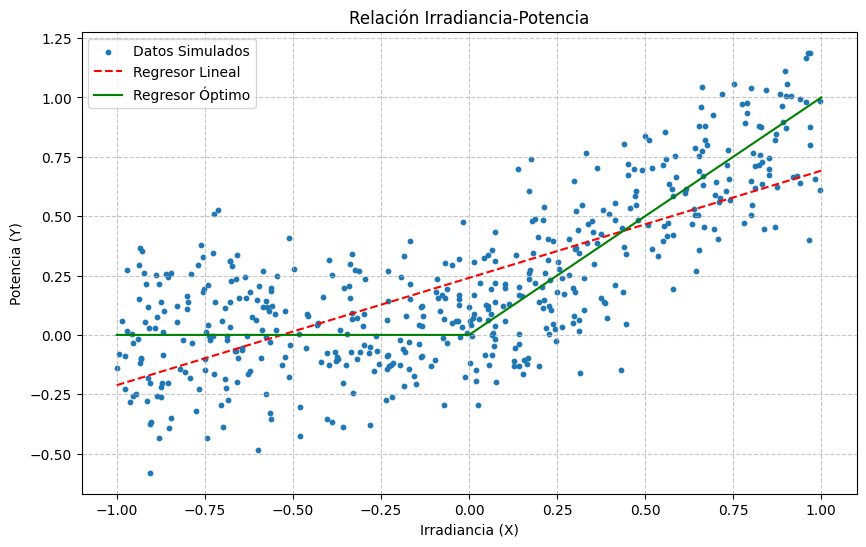

In [7]:
# Gráficos
ejex=np.linspace(-1,1,n)
y_pred1=RegLineal.predict(ejex)


plt.figure(figsize=(10,6))
plt.scatter(X,Y_x, label = 'Datos Simulados', s=10)
plt.plot(ejex,y_pred1, color='red', label='Regresor Lineal',linestyle='--')
plt.plot(ejex,r(ejex), color='green', label='Regresor Óptimo') # Osea la esperanza de la condicional, es decir la ReLU
plt.xlabel('Irradiancia (X)')
plt.ylabel('Potencia (Y)')
plt.title('Relación Irradiancia-Potencia')
plt.grid(True,alpha = 0.7,linestyle='--')
plt.legend(loc='upper left')
plt.show()

d) $Gradiente$ $Descendente$

El método del gradiente descendente es un algoritmo numérico de optimización, que consiste en igualar a cero la derivada de una función a minimizar $J(θ)$ numericamente. 
\begin{equation}
\theta_{t+1} = \theta_t - \alpha \cdot \nabla J(\theta_{t+1})
\end{equation}
donde $α > 0$ recibe el nombre de learning rate o tasa de aprendizaje. Debe elegirse un $α$ adecuado para que el algoritmo no sea ni muy lento en la convergencia, ni que oscile mucho entorno al valor de equilibrio, o incluso diverger.

En nuestro caso tenemos la función costo que responde a:
\begin{equation}
J(b, w) = \frac{1}{n} \sum_{i=1}^{n} \left(y_i - (b + w⋅ x_i)\right)^2
\end{equation}
y luego el gradiente indica la dirección de mayor incremento de $J$, $∇J=[\frac{\partial J}{\partial b}, \frac{\partial J}{\partial w}]$, y como se quiere minimizar $J$, se avanza en la dirección opuesta al gradiente.
\begin{equation}
\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} \left(y_i - \hat{y}_i\right)
\end{equation}

\begin{equation}
\frac{\partial J}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} x_i \left(y_i - \hat{y}_i\right)
\end{equation}



Defino nuevamente la clase de RegLineal, pero esta vez con el método del gradiente descendente incluido:

In [8]:
class RegLineal:
    def __init__(self):
      self.params = None  # Inicializo los parámetros de b y w  # Voy guardando en este arreglo la evolucion del valor que va tomando el parámetro w en funcion de las iteraciones
      self.w_evolucion=[] #Dejo este arreglo vacío para ir guardando la evolución
      self.epsilon=0.001
      self.max_it=800
      self.reg=[0,0]
    #Etapa de entrenamiento
    def fit(self,X,y):
      # Primero que nada añado la columna de 1's para el parámetro b
      i=len(X)
      X_b = np.vstack((np.ones(i), X)).T #vstack() apila los vectores y .T transpone la matriz
          # Queda una cosa así [1  X1]
          #                    [...   ...]
          #                    [1  Xn]
      # Se procede al cálculo de los parámetros utilizando el resultado de la pseudoinversa
      self.params = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

    #Etapa de testeo
    def predict(self,X):
      # Repito el cálculo de X_b
      i=len(X)
      X_b = np.vstack((np.ones(i), X)).T
      # Me devuelve los valores de y estimados mediante las muestras de X
      return X_b @ self.params

    # Cómputo del error
    def err_predict(self,X,y):
      y_pred = self.predict(X)
      # Planteo el ECM, es decir la esperanza de la diferencia al cuadrado
      return np.mean((y - y_pred)**2)
    
    # Método del gradiente descendente
    def fit_gradient(self, X, y, learning_rate):
      # Inicializo los parámetros
        b, w = 0.0, 0.0
        self.w_evolucion = []

        for i in range(self.max_it):
            y_pred = b + w*X
            grad_b = -2*np.mean(y - y_pred)
            grad_w = -2*np.mean((y - y_pred) * X)

            # Actualizo parámetros
            b = b - learning_rate * grad_b
            w = w - learning_rate * grad_w


            if np.sqrt(grad_b**2 + grad_w**2) < self.epsilon:
                break

            self.w_evolucion.append(w)

        # Guardo los parámetros finales
        self.params = np.array([b, w])

    def predict_gd(self,X):
        b, w = self.params
        return b + w * X
    
    def err_predict_gd(self,X,y):
        y_pred = self.predict_gd(X)
        return np.mean((y - y_pred)**2)

    def grafw(self):
        plt.plot(self.w_evolucion)
        plt.title("Evolución de w")
        plt.xlabel("Iteraciones")
        plt.ylabel("Valor de w")
        plt.show()

In [9]:
#Ahora probamos:
graddesc=RegLineal()
graddesc.fit_gradient(X, Y_x, learning_rate=0.01)
err_predict_gd=graddesc.err_predict_gd(X,Y_x)
error_entrenamiento_gd = graddesc.err_predict_gd(X,Y_x)
print("Error de entrenamiento con GD:", err_predict_gd)
print("Los parámetros encontrados para b y w con GD son",graddesc.params)


Error de entrenamiento con GD: 0.056875262731550996
Los parámetros encontrados para b y w con GD son [0.23977765 0.44873664]


Ahora, realicemos el testeo para una irridancia de 0,5

In [10]:
# Testeo
Y_predirr=graddesc.predict_gd(np.array([0.5]))

print("El valor predicho de potencia, mediante la recta de regresión, para una irradiancia ", irr_p, "es",Y_predirr )


El valor predicho de potencia, mediante la recta de regresión, para una irradiancia  0.5 es [0.46414597]


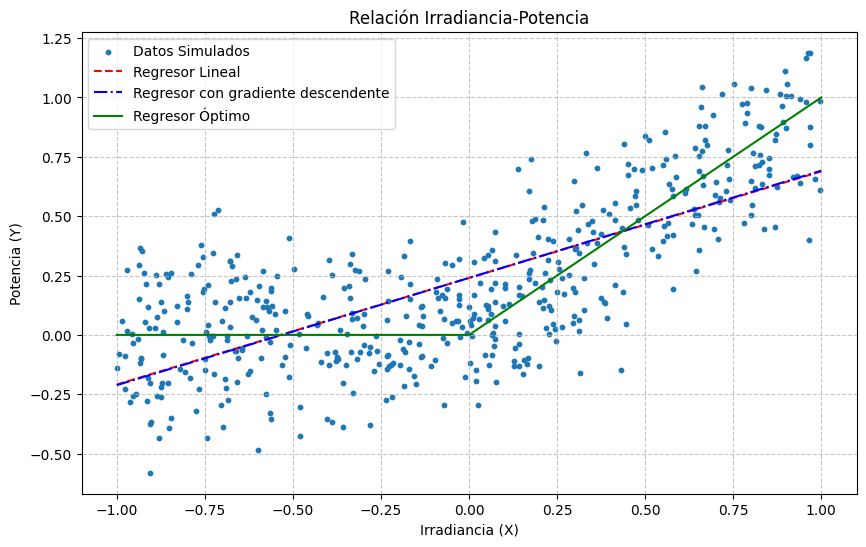

In [11]:
# Gráficos
ejex=np.linspace(-1,1,n)
y_pred2=graddesc.predict_gd(ejex)


plt.figure(figsize=(10,6))
plt.scatter(X,Y_x, label = 'Datos Simulados', s=10)
plt.plot(ejex,y_pred2, color='red', label='Regresor Lineal',linestyle='--')
plt.plot(ejex,y_pred1, color='blue', label='Regresor con gradiente descendente',linestyle='-.')
plt.plot(ejex,r(ejex), color='green', label='Regresor Óptimo') # Osea la esperanza de la condicional, es decir la ReLU
plt.xlabel('Irradiancia (X)')
plt.ylabel('Potencia (Y)')
plt.title('Relación Irradiancia-Potencia')
plt.grid(True,alpha = 0.7,linestyle='--')
plt.legend(loc='upper left')
plt.show()

Se realiza el gráfico de la evolución de w a lo largo del tiempo:

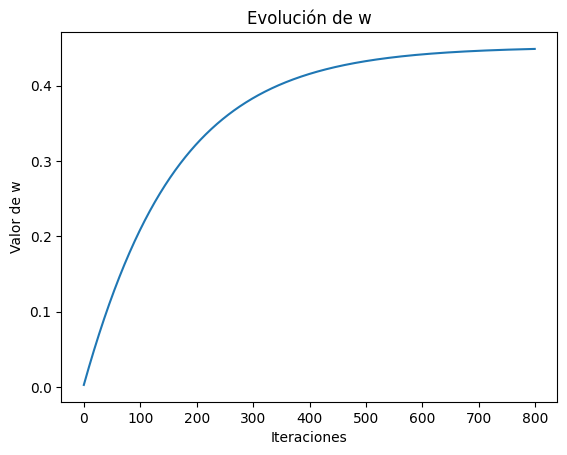

In [12]:
graddesc.grafw()

Se observa que a medida que el número de iteraciones aumenta, el valor de $w$ resulta asintótico (alrededor de los 0.5)